<a href="https://colab.research.google.com/github/Phan-Van-Duy-Phuc/DOAN2/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [37]:
df = pd.read_csv("data.csv")
df.head(10)

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,85.7810,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


In [66]:
fig = px.line(df)
fig.show()

In [45]:
def mean_squared_error(y_true, y_predicted):
     
    # Calculating the loss or cost
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost
 
# Gradient Descent Function

def gradient_descent(x, y, iterations = 1000, learning_rate = 0.0001,
                     stopping_threshold = 1e-6):
     
    # Initializing weight, bias, learning rate and iterations
    current_weight = 0.1
    current_bias = 0.01
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(x))
     
    costs = []
    weights = []
    previous_cost = None
     
    # Estimation of optimal parameters
    for i in range(iterations):
         
        # Making predictions
        y_predicted = (current_weight * x) + current_bias
         
        # Calculating the current cost
        current_cost = mean_squared_error(y, y_predicted)
 
        # If the change in cost is less than or equal to
        # stopping_threshold we stop the gradient descent
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break
         
        previous_cost = current_cost
 
        costs.append(current_cost)
        weights.append(current_weight)
         
        # Calculating the gradients
        weight_derivative = -(2/n) * sum(x * (y-y_predicted))
        bias_derivative = -(2/n) * sum(y-y_predicted)
         
        # Updating weights and bias
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)
                 
        # Printing the parameters for each 1000th iteration
        print(f"Iteration {i+1}: Cost {current_cost}, Weight \
        {current_weight}, Bias {current_bias}")
     
     
    # Visualizing the weights and cost at for all iterations
    plt.figure(figsize = (8,6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()
     
    return current_weight, current_bias

In [52]:
X = np.array(df['x'])
Y = np.array(df['y'])

Iteration 1: Cost 50.635801013545354, Weight         0.11182793469856908, Bias 0.010986712886597938
Iteration 2: Cost 49.249169658111576, Weight         0.12328387602670886, Bias 0.011952042929030066
Iteration 3: Cost 47.94820361717344, Weight         0.1343795060437039, Bias 0.012896660696530924
Iteration 4: Cost 46.727606952115174, Weight         0.14512613994777074, Bias 0.013821215700003088
Iteration 5: Cost 45.58241112667387, Weight         0.15553473759688968, Bias 0.014726337053328823
Iteration 6: Cost 44.50795476646662, Weight         0.16561591466783887, Bias 0.015612634113914035
Iteration 7: Cost 43.49986466981227, Weight         0.1753799534647922, Bias 0.01648069710311671
Iteration 8: Cost 42.55403799249063, Weight         0.18483681338848618, Bias 0.017331097707191545
Iteration 9: Cost 41.666625533865, Weight         0.19399614107661511, Bias 0.018164389659362633
Iteration 10: Cost 40.83401605627999, Weight         0.20286728022577946, Bias 0.018981109303616846
Iteration 1

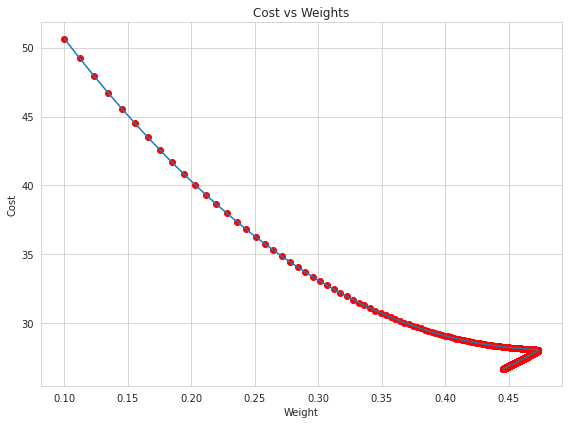

Estimated Weight: 0.44519360152229254
Estimated Bias: 0.5892576355556202


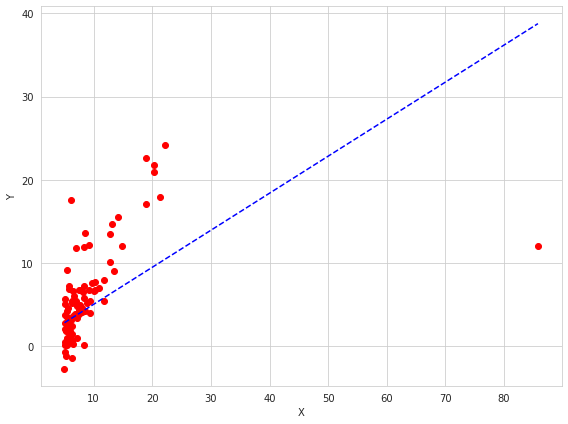

In [54]:
# Estimating weight and bias using gradient descent
estimated_weight, estimated_bias = gradient_descent(X, Y, iterations=2000)
print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")
 
    # Making predictions using estimated parameters
Y_pred = estimated_weight*X + estimated_bias
 
    # Plotting the regression line
plt.figure(figsize = (8,6))
plt.scatter(X, Y, marker='o', color='red')
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',
             markersize=10,linestyle='dashed')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [55]:
def predict(x, b0, b1):
    """Predicts the value of prediction based on
       current value of regression coefficients when input is x"""
    # Y = b0 + b1 * X
    return b0 + b1 * x

In [56]:
def cost(x, y, b0, b1):
    # y is a list of expected value
    errors = []
    for x, y in zip(x, y):
        prediction = predict(x, b0, b1)
        expected = y
        difference = prediction-expected
        errors.append(difference)
    # Now, we have errors for all the observations,
     
    # for some input, the value of error might be positive
    # and for some input might be negative,
    # and if we directly add them up,
    # the values might cancel out leading to wrong output."
     
    # Hence, we use concept of mean squared error.
    # in mse, we return mean of square of all the errors.
    mse = sum([e * e for e in errors])/len(errors)
    return mse

In [57]:
def cost_derivative(x, y, b0, b1, i):
    return sum([
                  2*(predict(xi, b0, b1)-yi)*1
                   if i == 0
                   else 2*(predict(xi, b0, b1)-yi)*xi
                   for xi, yi in zip(x, y)
           ])/len(x)

In [58]:
def update_coeff(x, y, b0, b1, i, alpha):
    bi -= alpha * cost_derivative(x, y, b0, b1, i)
    return bi

In [63]:
class LinearRegressor:
    def __init__(self, x, y, alpha = 0.01, b0 = 0, b1 = 0):
        """
            x: input feature
            y: result / target
            alpha: learning rate, default is 0.01
            b0, b1: linear regression coefficient.
        """
        self.i = 0
        self.x = x
        self.y = y
        self.alpha = alpha
        self.b0 = b0
        self.b1 = b1
        if len(x) != len(y):
            raise TypeError("x and y should have same number of rows.")
 
    def predict(model, x):
        """Predicts the value of prediction based on
           current value of regression coefficients when input is x"""
        # Y = b0 + b1 * X
        return model.b0 + model.b1 * x
 
    def cost_derivative(model, i):
        x, y, b0, b1 = model.x, model.y, model.b0, model.b1
        predict = model.predict
        return sum([
            2 * (predict(xi) - yi) * 1
            if i == 0
            else (predict(xi) - yi) * xi
            for xi, yi in zip(x, y)
        ]) / len(x)
 
    def update_coeff(model, i):
        cost_derivative = model.cost_derivative
        if i == 0:
            model.b0 -= model.alpha * cost_derivative(i)
        elif i == 1:
            model.b1 -= model.alpha * cost_derivative(i)
 
    def stop_iteration(model, max_epochs = 1000):
        model.i += 1
        if model.i == max_epochs:
            return True
        else:
            return False
 
    def fit(model):
        update_coeff = model.update_coeff
        model.i = 0
        while True:
            if model.stop_iteration():
                break
            else:
                update_coeff(0)
                update_coeff(1)
 
 
linearRegressor = LinearRegressor(X,Y)
linearRegressor.fit()
print(linearRegressor.predict(12))
 
    

6.740243163641521
